In [103]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

import os
from   io     import StringIO
import numpy  as np
import pandas as pd
import csv

import iris
import matplotlib.pyplot as plt
import numpy.ma as ma
%matplotlib inline
import cartopy.crs as ccrs
from   libs.plot_maps    import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


A short script which is useful for reformatting files

In [104]:
# Give location of file you want to change:
dir = "../data/UKESM/retrieved_codes/jul2000-jun2014/"
name = 'vegcover'
file =  name + '_jul' + "2000-2014.nc"

# ...and load it in:
pop_sim = iris.load_cube(dir + file)

# And where you want it saved: (this is currently set to the same place as it's loaded in)
dir_out = "../data/UKESM/retrieved_codes/jul2000-jun2014/"
outfile = 'vegcover_seed' + "2000-2014"


# If a template is required, give the location of it here:
# dir_m = "../data/UKESM/retrieved_codes/2000-2014/"
# file_m = name + "2000-2009.nc"

# # And load it in:
# mask = iris.load_cube(dir_m + file_m)

A quick plot to test if the variables have loaded in

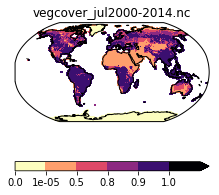

In [83]:
sim = pop_sim.collapsed('time', iris.analysis.MEAN)
# m = mask.collapsed('time', iris.analysis.MEAN)

sim.long_name = file
# m.long_name = file_m
plot_lonely_cube(sim, 1, 2, 1, cmap="magma_r", levels= None)
# plot_lonely_cube(m, 1, 2, 2, cmap="magma_r", levels= None)

#### Reformatting cube into a masked cube

In [54]:
# adj_sim = mask.copy()
# adj_sim.data = pop_sim.data

#### Performing a calculation on the file of interest

In [55]:
# pop_sim.data = pop_sim.data * 0.8

#### Filtering datapoints below/above certain level

Note: I'm not convinced this actually works...

In [134]:
# Attempt 1
# adj = pop_sim.copy()
# seed = np.ma.getmaskarray(pop_sim.data > 0.01)
# adj.data[seed] = 0


# Attempt 2
# adj.data[pop_sim.data < 0.1] = 0


# Attempt 3
# adj = pop_sim.copy()
# adj.data = np.where(seed, pop_sim.data, zeros)

In [151]:
adj = pop_sim.copy()
print(adj.data.mean())
for i in range(len(pop_sim.coord('time').points)):
    adj.data[i][pop_sim[i].data < 0.01] = 0
print(adj.data.mean())

0.47542155265833624
0.4753812076900436


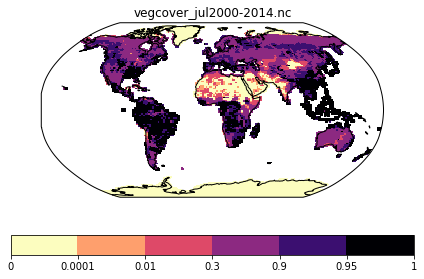

In [152]:
ad = adj.collapsed('time', iris.analysis.MEAN)
plot_lonely_cube(sim, 1, 1, 1, cmap="magma_r", levels= [0, 1e-4, 1e-2, 0.3, 0.9, 0.95, 1])

#### Saving the output

In [153]:
iris.save(adj, dir_out + outfile + '.nc')

Reload both and plot to make sure I haven't messed it up (these should be the same)

In [14]:
light = iris.load_cube(dir + file)
adj = iris.load_cube(dir_out + outfile + '.nc')

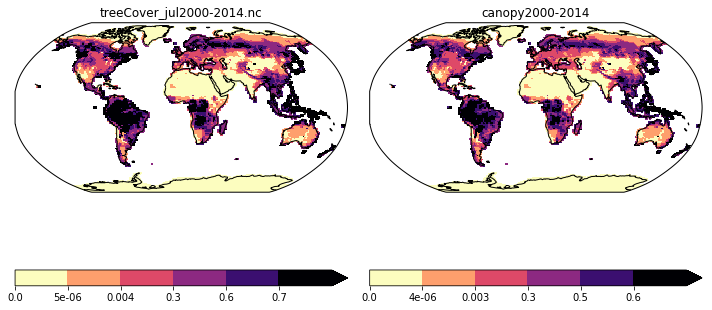

In [15]:
plt.figure(figsize = (10, 7.5))

sim = light.collapsed('time', iris.analysis.MEAN)
sim.long_name = file
obs = adj.collapsed('time', iris.analysis.MEAN)
obs.long_name = outfile

plot_lonely_cube(sim, 1, 2, 1, cmap="magma_r", levels= None)
plot_lonely_cube(obs, 1, 2, 2, cmap="magma_r", levels= None)